In [1]:
import sys
sys.path.append("..")

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from global_config import *

## Modifiable Configuration

loss: 0.4563  decode.loss_ce: 0.0535  decode.loss_lovasz: 0.2027  decode.acc_seg: 96.3512  aux.loss_ce: 0.0626  aux.loss_lovasz: 0.1375  aux.acc_seg: 94.7460

In [3]:
import os.path as osp
#timestamp = "20250322_201422"
timestamp = "20250324_020931"
log_suffix_path = f"{timestamp}/vis_data/scalars.json"
log_prefix_path = OUT_SEGFORMER_MITB5_DIR_PATH
#loss_metrics = ['loss', 'decode.loss_ce']
#loss_metrics = ['loss', 'decode.loss_ce', "decode.loss_dice", "aux.loss_ce", "aux.loss_lovasz"]
loss_metrics = ['loss', 'decode.loss_ce', "decode.loss_lovasz", "aux.loss_ce", "aux.loss_lovasz"]
acc_metrics = ["decode.acc_seg", "aux.acc_seg"]
val_metrics = ["aAcc", "mFscore", "mIoU", "mPrecision", "mRecall", "mAcc", "mDice"]

In [4]:
log_path = osp.join(log_prefix_path, log_suffix_path)
log_vis_res_saving_prefix_path = osp.join(osp.dirname(osp.dirname(log_path)), "vis_res")
if not osp.exists(log_vis_res_saving_prefix_path):
    os.makedirs(log_vis_res_saving_prefix_path)
log_path, log_vis_res_saving_prefix_path

('/home/featurize/work/AI6126project1/out/segformer_mit-b5/20250324_020931/vis_data/scalars.json',
 '/home/featurize/work/AI6126project1/out/segformer_mit-b5/20250324_020931/vis_res')

In [5]:
with open(log_path, "r") as f:
    json_list = f.readlines()
type(json_list), len(json_list)

(list, 480)

In [6]:
eval(json_list[0])

{'base_lr': 3.962697798532355e-06,
 'lr': 3.962697798532355e-06,
 'data_time': 0.02478513717651367,
 'loss': 3.1127617597579955,
 'decode.loss_ce': 1.249443280696869,
 'decode.loss_lovasz': 0.9421053946018219,
 'decode.acc_seg': 72.791259765625,
 'aux.loss_ce': 0.5424521803855896,
 'aux.loss_lovasz': 0.3787608802318573,
 'aux.acc_seg': 42.87642288208008,
 'time': 0.49780428409576416,
 'iter': 100,
 'memory': 11764,
 'step': 100}

In [7]:
df_train = pd.DataFrame()
df_val = pd.DataFrame()
for each in json_list: #?json_list[:-1]
    if "aAcc" in each:
        df_val = df_val.append(eval(each), ignore_index=True)
    else:
        df_train = df_train.append(eval(each), ignore_index=True)

In [8]:
df_train

,base_lr,lr,data_time,loss,decode.loss_ce,decode.loss_lovasz,decode.acc_seg,aux.loss_ce,aux.loss_lovasz,aux.acc_seg,time,iter,memory,step
0,0.000004,0.000004,0.024785,3.112762,1.249443,0.942105,72.791260,0.542452,0.378761,42.876423,0.497804,100.0,11764.0,100.0
1,0.000008,0.000008,0.019957,2.404663,0.677290,0.874677,83.356636,0.477116,0.375579,74.294838,0.487772,200.0,11762.0,200.0
2,0.000012,0.000012,0.020150,1.918343,0.383675,0.777905,82.711021,0.388252,0.368510,64.462128,0.488095,300.0,11766.0,300.0
3,0.000016,0.000016,0.019331,1.565054,0.259643,0.653957,92.196312,0.294539,0.356916,73.378059,0.482581,400.0,11780.0,400.0
4,0.000020,0.000020,0.021104,1.278702,0.170246,0.534078,87.848953,0.227577,0.346801,65.829643,0.488839,500.0,11765.0,500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.000046,0.000046,0.021297,0.265389,0.026883,0.101587,98.429817,0.036366,0.100553,96.171272,0.487084,39600.0,11766.0,39600.0
396,0.000046,0.000046,0.022958,0.265454,0.030635,0.104614,97.957199,0.037170,0.093035,94.522911,0.495069,39700.0,11782.0,39700.0
397,0.000046,0.000046,0.022988,0.245187,0.024512,0.099929,97.904785,0.031206,0.089541,93.274734,0.494281,39800.0,11764.0,39800.0
398,0.000045,0.000045,0.022647,0.221752,0.023365,0.086739,98.249115,0.027763,0.083885,96.042618,0.492453,39900.0,11798.0,39900.0


In [9]:
df_val

,aAcc,mFscore,mPrecision,mRecall,mIoU,mAcc,mDice,data_time,time,step
0,88.54,79.84,75.69,49.93,39.22,49.93,46.22,0.006645,0.070284,500.0
1,92.74,84.76,84.53,81.08,70.46,81.08,80.30,0.002223,0.058373,1000.0
2,93.41,86.52,84.62,84.41,72.75,84.41,81.96,0.002444,0.059501,1500.0
3,93.76,87.49,85.36,85.35,73.96,85.35,82.89,0.002451,0.063282,2000.0
4,93.81,87.44,88.01,82.66,74.16,82.66,82.84,0.002328,0.061388,2500.0
...,...,...,...,...,...,...,...,...,...,...
75,94.35,83.60,86.85,81.48,74.30,81.48,83.60,0.002288,0.059700,38000.0
76,94.69,86.04,86.86,85.49,77.44,85.49,86.04,0.002285,0.060519,38500.0
77,94.51,84.92,86.35,84.20,75.92,84.20,84.92,0.002261,0.058519,39000.0
78,94.40,84.21,86.22,82.98,74.98,82.98,84.21,0.002547,0.064482,39500.0


### trainning and validation csv

In [10]:
df_train.to_csv(osp.join(log_vis_res_saving_prefix_path, "train_log.csv"), index=False)
df_val.to_csv(osp.join(log_vis_res_saving_prefix_path, "val_log.csv"), index=False)

In [11]:
from matplotlib import colors as mcolors
import random
random.seed(124)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'black', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'red', 'sienna', 'chocolate', 'yellow', 'olivedrab', 'yellowgreen', 'darkolivegreen', 'forestgreen', 'limegreen', 'darkgreen', 'green', 'lime', 'seagreen', 'mediumseagreen', 'darkslategray', 'darkslategrey', 'teal', 'darkcyan', 'dodgerblue', 'navy', 'darkblue', 'mediumblue', 'blue', 'slateblue', 'darkslateblue', 'mediumslateblue', 'mediumpurple', 'rebeccapurple', 'blueviolet', 'indigo', 'darkorchid', 'darkviolet', 'mediumorchid', 'purple', 'darkmagenta', 'fuchsia', 'magenta', 'orchid', 'mediumvioletred', 'deeppink', 'hotpink']
markers = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_",0,1,2,3,4,5,6,7,8,9,10,11]
linestyle = ['--', '-.', '-']

def get_line_arg():
    line_arg = {}
    line_arg['color'] = random.choice(colors)
    # line_arg['marker'] = random.choice(markers)
    line_arg['linestyle'] = random.choice(linestyle)
    line_arg['linewidth'] = random.randint(1, 4)
    # line_arg['markersize'] = random.randint(3, 5)
    return line_arg

### training loss

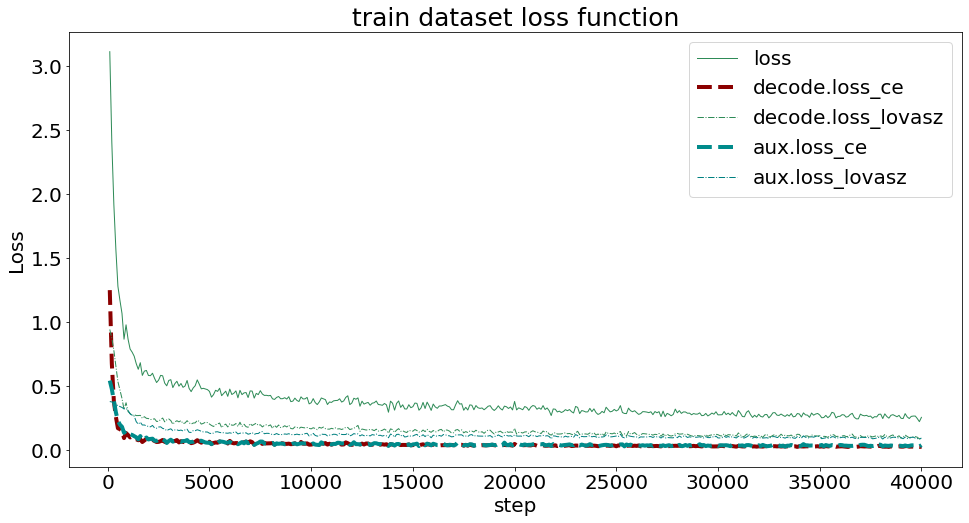

In [12]:
plt.figure(figsize=(16, 8))

x = df_train['step']
for y in loss_metrics:
    try:
        plt.plot(x, df_train[y], label=y, **get_line_arg())
    except:
        pass

plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('Loss', fontsize=20)
plt.title('train dataset loss function', fontsize=25)

plt.legend(fontsize=20)

plt.savefig(osp.join(log_vis_res_saving_prefix_path, "tran_loss.jpg"), dpi=120, bbox_inches='tight')

plt.show()

### train accuracy

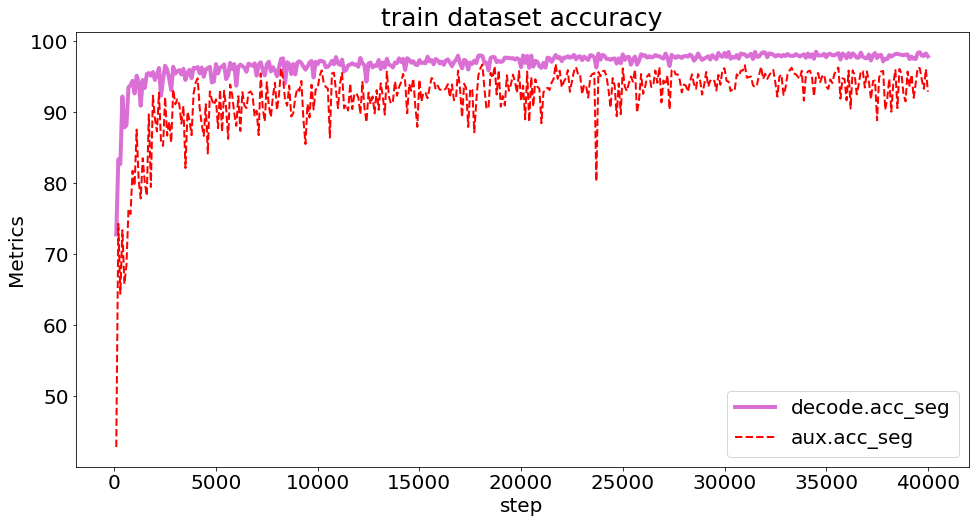

In [13]:
plt.figure(figsize=(16, 8))

x = df_train['step']
for y in acc_metrics:
    try:
        plt.plot(x, df_train[y], label=y, **get_line_arg())
    except:
        pass

plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('Metrics', fontsize=20)
plt.title('train dataset accuracy', fontsize=25)

plt.legend(fontsize=20)

plt.savefig(osp.join(log_vis_res_saving_prefix_path, "train_accuracy.jpg"), dpi=120, bbox_inches='tight')

plt.show()

### validation metrics

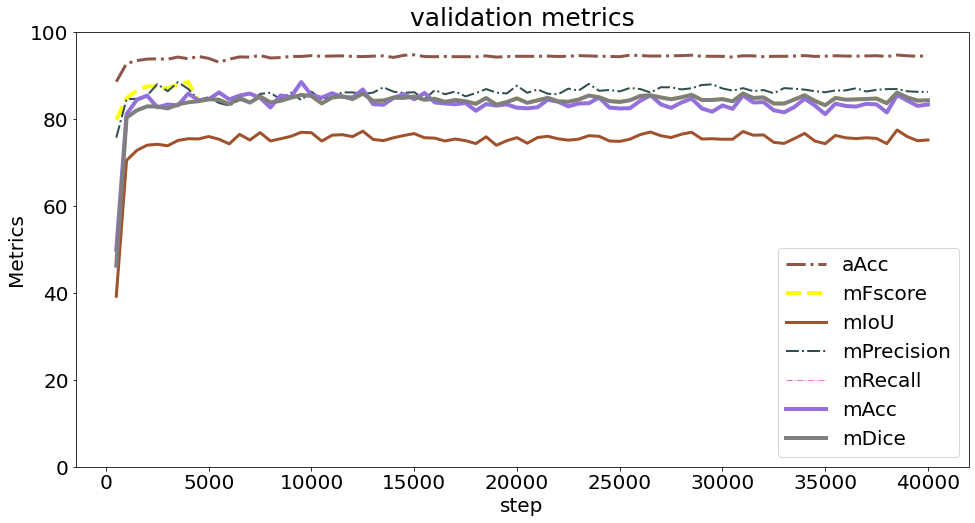

In [14]:
plt.figure(figsize=(16, 8))

x = df_val['step']
for y in val_metrics:
    try:
        plt.plot(x, df_val[y], label=y, **get_line_arg())
    except:
        pass

plt.tick_params(labelsize=20)
plt.ylim([0, 100])
plt.xlabel('step', fontsize=20)
plt.ylabel('Metrics', fontsize=20)
plt.title('validation metrics', fontsize=25)

plt.legend(fontsize=20)

plt.savefig(osp.join(log_vis_res_saving_prefix_path, "val_metrics.jpg"), dpi=120, bbox_inches='tight')

plt.show()